In [ ]:
import pandas as pd

# Carica il dataset di training
data_train = pd.read_csv('data_train.csv')

# Carica il dataset degli utenti target, a cui dare reccomendation
data_target_users_test = pd.read_csv('data_target_users_test.csv')

# Carica il file con i metadata degli item (libri)
data_ICM_metadata = pd.read_csv('data_ICM_metadata.csv')

### ANALISI DEI DATI

In [ ]:
data_train

,user_id,item_id,data
0,0,0,1.0
1,0,2,1.0
2,0,120,1.0
3,0,128,1.0
4,0,211,1.0
...,...,...,...
1764602,35735,37802,1.0
1764603,35735,37803,1.0
1764604,35735,37805,1.0
1764605,35735,38000,1.0


In [ ]:
data_target_users_test

,user_id
0,0
1,1
2,2
3,3
4,4
...,...
34226,35729
34227,35730
34228,35731
34229,35734


In [ ]:
data_ICM_metadata

,item_id,feature_id,data
0,2519,0,1.0
1,2642,0,1.0
2,3316,0,1.0
3,3400,0,1.0
4,3472,0,1.0
...,...,...,...
2940035,38107,94326,1.0
2940036,38107,94327,1.0
2940037,38107,94328,1.0
2940038,38112,94329,1.0


####analisi URM

In [ ]:
n_interactions = len(data_train)
print ("The number of interactions is {}".format(n_interactions))

The number of interactions is 1764607


In [ ]:
userID_unique = data_train["user_id"].unique()
itemID_unique = data_train["item_id"].unique()
n_users = len(userID_unique)
n_items = len(itemID_unique)

print ("Number of items\t {}, Number of users\t {}".format(n_items, n_users))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemID_unique), max(userID_unique)))
print("This confirms that the IDs are zero-indexed and continuous, covering every integer from 0 to 38,120, and from 0 to 35735, respectively")

Number of items	 38121, Number of users	 35736
Max ID items	 38120, Max Id users	 35735

This confirms that the IDs are zero-indexed and continuous, covering every integer from 0 to 38,120, and from 0 to 35735, respectively


In [ ]:
# Densità della matrice (percentuale di celle non nulle)
density = n_interactions / (n_users * n_items)
print(f"Densità della matrice: {density:.4%}")

Densità della matrice: 0.1295%


In [ ]:

print ("Average interactions per user {:.2f}".format(n_interactions/n_users))
print ("Average interactions per item {:.2f}\n".format(n_interactions/n_items))

print ("Sparsity (so how many zeroes are there) {:.2f} %".format((1-float(n_interactions)/(n_items*n_users))*100))

Average interactions per user 49.38
Average interactions per item 46.29

Sparsity (so how many zeroes are there) 99.87 %


In [ ]:
#creazione URM
import scipy.sparse as sp

# Crea una matrice sparse User-Item utilizzando gli ID utenti e item
user_list = data_train['user_id'].values
item_list = data_train['item_id'].values
data_list = data_train['data'].values

# Creiamo la matrice User-Item come matrice sparsa
URM_all = sp.coo_matrix((data_list, (user_list, item_list)))
print(URM_all.shape)

(35736, 38121)


In [ ]:
import numpy as np

item_popularity = np.ediff1d(URM_all.tocsc().indptr)
item_popularity = np.sort(item_popularity)
item_popularity

array([  12,   13,   13, ..., 1254, 1310, 1470], dtype=int32)

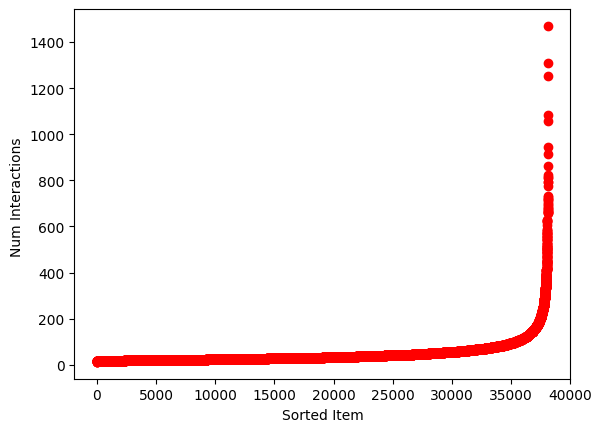

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.plot(item_popularity, 'ro')
pyplot.ylabel('Num Interactions ')
pyplot.xlabel('Sorted Item')
pyplot.show()

In [ ]:
ten_percent = int(n_items/10)

print("Average per-item interactions over the whole dataset {:.2f}".
      format(item_popularity.mean()))

print("Average per-item interactions for the top 10% popular items {:.2f}".
      format(item_popularity[-ten_percent:].mean()))

print("Average per-item interactions for the least 10% popular items {:.2f}".
      format(item_popularity[:ten_percent].mean()))

print("Average per-item interactions for the median 10% popular items {:.2f}".
      format(item_popularity[int(n_items*0.45):int(n_items*0.55)].mean()))

Average per-item interactions over the whole dataset 46.29
Average per-item interactions for the top 10% popular items 153.63
Average per-item interactions for the least 10% popular items 17.95
Average per-item interactions for the median 10% popular items 31.50


In [ ]:
print("Number of items with zero interactions {}".
      format(np.sum(item_popularity==0)))

Number of items with zero interactions 0


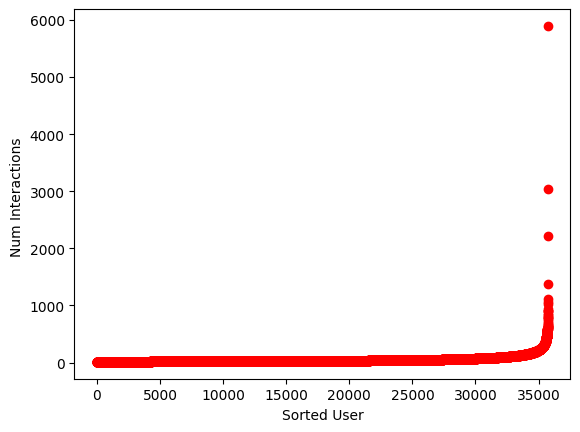

In [ ]:
user_activity = np.ediff1d(URM_all.tocsr().indptr)
user_activity = np.sort(user_activity)


pyplot.plot(user_activity, 'ro')
pyplot.ylabel('Num Interactions ')
pyplot.xlabel('Sorted User')
pyplot.show()

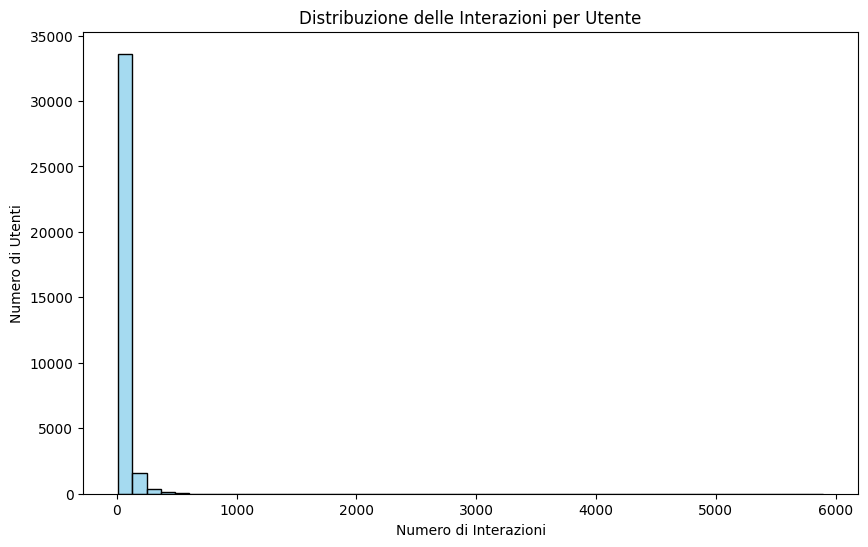

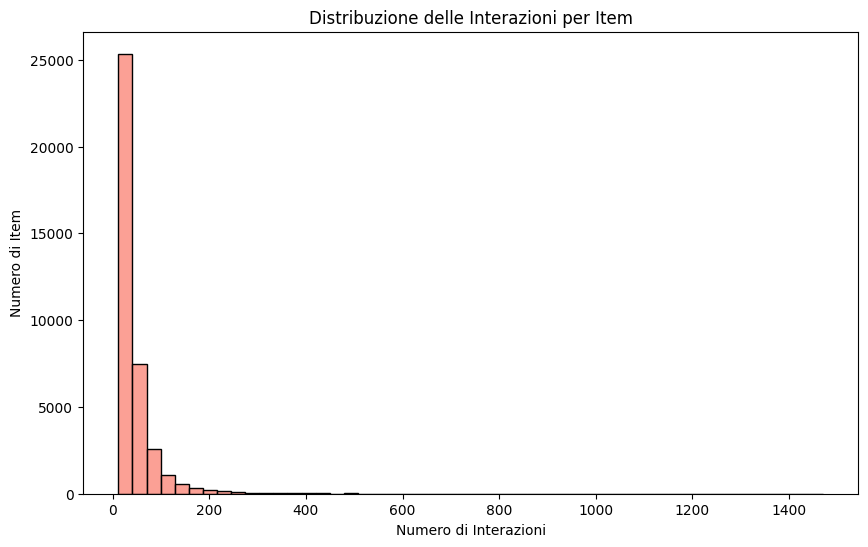

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuzione delle interazioni per utente
user_activity = np.ediff1d(URM_all.tocsr().indptr)
plt.figure(figsize=(10, 6))
sns.histplot(user_activity, bins=50, kde=False, color='skyblue')
plt.title('Distribuzione delle Interazioni per Utente')
plt.xlabel('Numero di Interazioni')
plt.ylabel('Numero di Utenti')
plt.show()

# Distribuzione delle interazioni per item
item_popularity = np.ediff1d(URM_all.tocsc().indptr)
plt.figure(figsize=(10, 6))
sns.histplot(item_popularity, bins=50, kde=False, color='salmon')
plt.title('Distribuzione delle Interazioni per Item')
plt.xlabel('Numero di Interazioni')
plt.ylabel('Numero di Item')
plt.show()


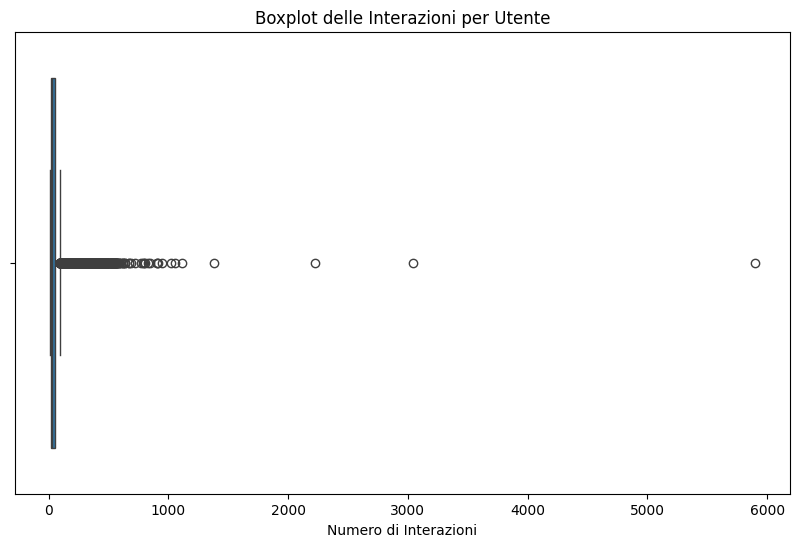

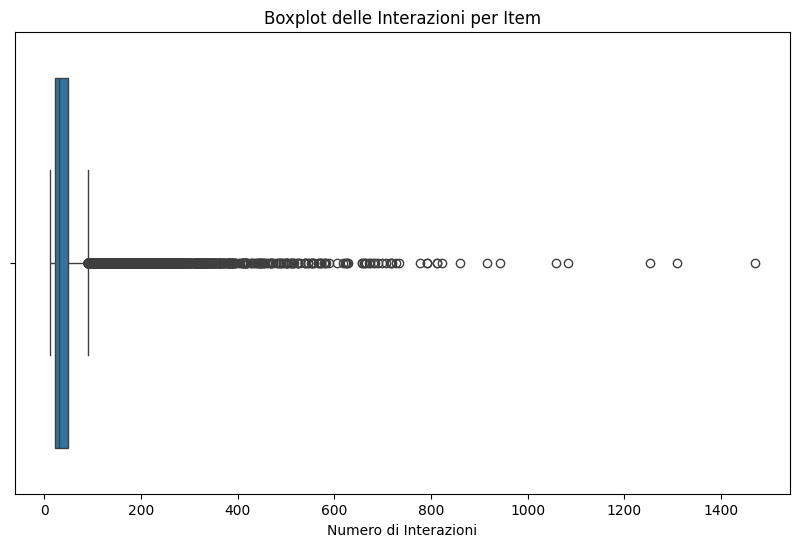

In [ ]:
#per identificare outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=user_activity)
plt.title('Boxplot delle Interazioni per Utente')
plt.xlabel('Numero di Interazioni')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=item_popularity)
plt.title('Boxplot delle Interazioni per Item')
plt.xlabel('Numero di Interazioni')
plt.show()


####Analisi ICM

In [ ]:
print(data_ICM_metadata['feature_id'].unique())
# Visualizza le prime 5 righe
print(data_ICM_metadata.head())
# Verifica i valori unici nella colonna 'data'
print(data_ICM_metadata['data'].unique())

# Conta il numero di feature per ciascun item
features_per_item = data_ICM_metadata.groupby('item_id').size()

# Statistiche descrittive
print(features_per_item.describe())

[    0     1     2 ... 94328 94329 94330]
   item_id  feature_id  data
0     2519           0   1.0
1     2642           0   1.0
2     3316           0   1.0
3     3400           0   1.0
4     3472           0   1.0
[1.]
count    38121.000000
mean        77.123895
std         74.742438
min          1.000000
25%         17.000000
50%         66.000000
75%        113.000000
max       2013.000000
dtype: float64


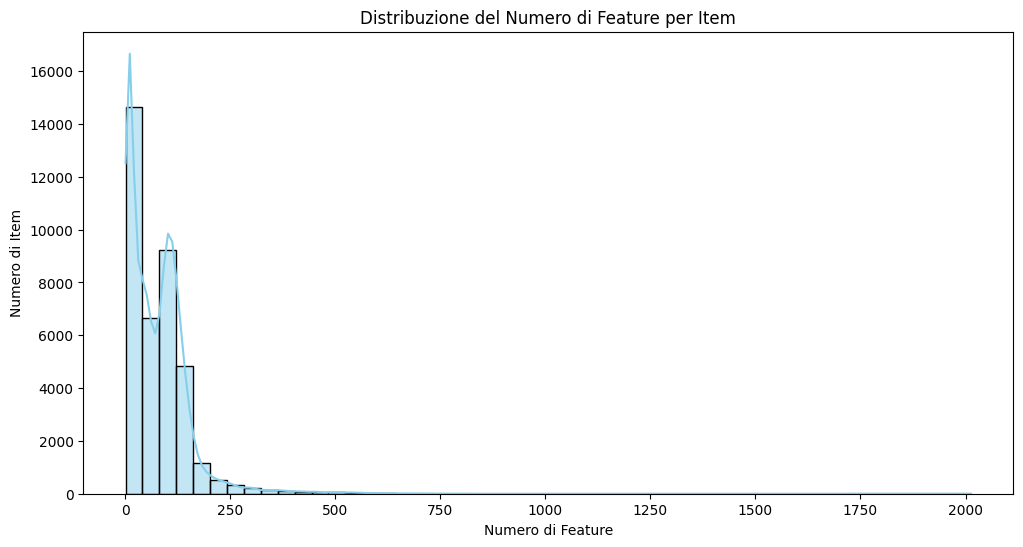

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(features_per_item, bins=50, kde=True, color='skyblue')
plt.title('Distribuzione del Numero di Feature per Item')
plt.xlabel('Numero di Feature')
plt.ylabel('Numero di Item')
plt.show()


In [ ]:
# Conta il numero di item per ciascuna feature
items_per_feature = data_ICM_metadata.groupby('feature_id').size()

# Top 10 feature più comuni
top_features = items_per_feature.sort_values(ascending=False).head(10)
print("Top 10 feature più comuni:")
print(top_features)

# Top 10 feature meno comuni
bottom_features = items_per_feature.sort_values(ascending=True).head(10)
print("\n10 feature meno comuni:")
print(bottom_features)


Top 10 feature più comuni:
feature_id
2       38121
131     17750
41      12181
178     11673
420     10987
86      10947
89      10712
1175    10221
100     10187
101      9237
dtype: int64

10 feature meno comuni:
feature_id
47165    1
62127    1
62126    1
62125    1
62123    1
62122    1
62121    1
62120    1
62128    1
62119    1
dtype: int64


<ipython-input-25-5a0f7efc7d6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index.astype(str), y=top_features.values, palette='viridis')


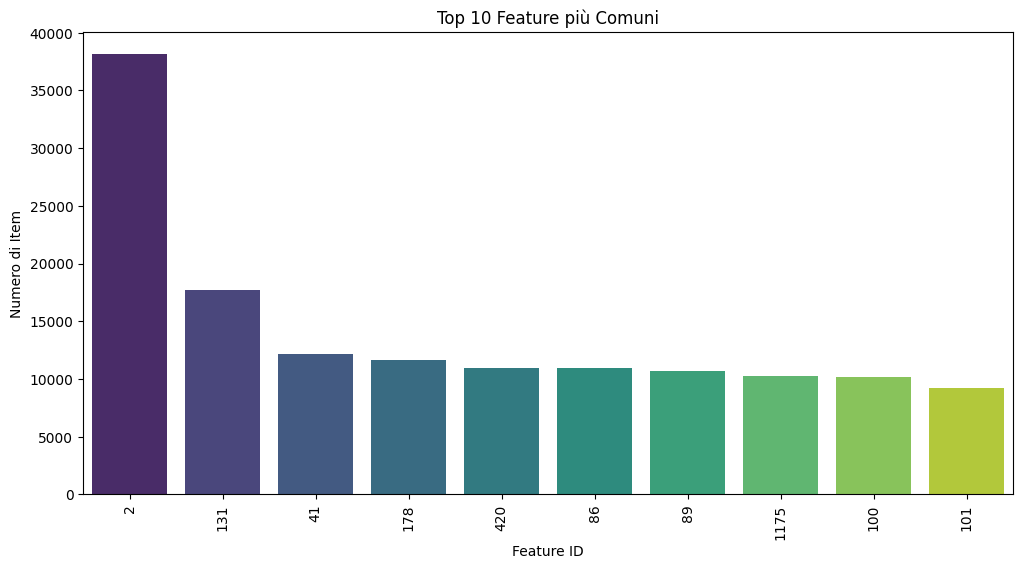

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizzazione delle feature più comuni
plt.figure(figsize=(12, 6))
sns.barplot(x=top_features.index.astype(str), y=top_features.values, palette='viridis')
plt.title('Top 10 Feature più Comuni')
plt.xlabel('Feature ID')
plt.ylabel('Numero di Item')
plt.xticks(rotation=90)
plt.show()




In [ ]:
import pandas as pd

# Filtra il DataFrame per feature_id = 2
feature_2_df = data_ICM_metadata[data_ICM_metadata['feature_id'] == 2]
feature_131_df = data_ICM_metadata[data_ICM_metadata['feature_id'] == 131]

# Verifica se 'data' è sempre 1 o se è necessario filtrare
unique_data_values = feature_2_df['data'].unique()
print(f"Valori unici nella colonna 'data' per feature_id=2: {unique_data_values}")
unique_data_values131 = feature_131_df['data'].unique()
print(f"Valori unici nella colonna 'data' per feature_id=2: {unique_data_values131}")

# Se 'data' può essere 0 o 1, filtra solo le righe con data = 1
if 1 in unique_data_values:
    feature_2_present_df = feature_2_df[feature_2_df['data'] == 1]
else:
    feature_2_present_df = feature_2_df

if 1 in unique_data_values131:
    feature_131_present_df = feature_131_df[feature_131_df['data'] == 1]
else:
    feature_131_present_df = feature_131_df

# Conta il numero di item unici con feature_id = 2
num_items_with_feature_2 = feature_2_present_df['item_id'].nunique()
num_items_with_feature_131 = feature_131_present_df['item_id'].nunique()

# Numero totale di feature unici
num_features = data_ICM_metadata['feature_id'].nunique()
print(f"Numero totale di feature: {num_features} e item: {n_items}")


import pandas as pd

# Filtra il DataFrame per feature_id = 2
feature_2_df = data_ICM_metadata[data_ICM_metadata['feature_id'] == 2]
feature_131_df = data_ICM_metadata[data_ICM_metadata['feature_id'] == 131]

# Verifica se 'data' è sempre 1 o se è necessario filtrare
unique_data_values = feature_2_df['data'].unique()
print(f"Valori unici nella colonna 'data' per feature_id=2: {unique_data_values}")
unique_data_values131 = feature_131_df['data'].unique()
print(f"Valori unici nella colonna 'data' per feature_id=2: {unique_data_values131}")

# Se 'data' può essere 0 o 1, filtra solo le righe con data = 1
if 1 in unique_data_values:
    feature_2_present_df = feature_2_df[feature_2_df['data'] == 1]
else:
    feature_2_present_df = feature_2_df

if 1 in unique_data_values131:
    feature_131_present_df = feature_131_df[feature_131_df['data'] == 1]
else:
    feature_131_present_df = feature_131_df

# Conta il numero di item unici con feature_id = 2
num_items_with_feature_2 = feature_2_present_df['item_id'].nunique()
num_items_with_feature_131 = feature_131_present_df['item_id'].nunique()

# Numero totale di feature unici
num_features = data_ICM_metadata['feature_id'].nunique()
print(f"Numero totale di feature: {num_features} e item: {n_items}")


print(f"Numero di item con feature_id = 2: {num_items_with_feature_2}, cioè il {(num_items_with_feature_2/n_items)*100}% degli ha il feature con id = 2! è inutile")
print(f"Numero di item con feature_id = 131: {num_items_with_feature_131}, cioè il {(num_items_with_feature_131/n_items)*100}%")


Valori unici nella colonna 'data' per feature_id=2: [1.]
Valori unici nella colonna 'data' per feature_id=2: [1.]
Numero totale di feature: 94331 e item: 38121
Valori unici nella colonna 'data' per feature_id=2: [1.]
Valori unici nella colonna 'data' per feature_id=2: [1.]
Numero totale di feature: 94331 e item: 38121
Numero di item con feature_id = 2: 38121, cioè il 100.0% degli ha il feature con id = 2! è inutile
Numero di item con feature_id = 131: 17750, cioè il 46.56226227013982%
